In [304]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt 
import matplotlib.dates as mdates
from scipy.optimize import curve_fit

In [305]:
df = pd.read_csv('covid.results.deterministic.csv',sep='\t')
dfD = pd.read_csv('covid_19_manual.csv')

# fix date format
df['time'] = pd.to_datetime(df['time'])
df = df.rename(columns= {'time':'Date'})
dfD['Date'] = pd.to_datetime(dfD['Date'])

In [306]:
cum_infected = np.zeros(len(df['infectious']))
infectious = df['infectious']
dead = df['dead']
recovered = df['recovered']

cum_infected[0] = infectious[0]
cum_infected[1] = infectious[1]
cum_i = cum_infected[1]

for i in range(2,len(cum_infected)):
    delta_infect = infectious[i] - infectious[i-1]
    delta_recovered = recovered[i-1] - recovered[i-2]
    delta_dead = dead[i-1] - dead[i-2]
    new_infect =  delta_infect + delta_recovered + delta_dead
    cum_i = cum_i + new_infect
    cum_infected[i] = cum_i

# add column to dataframe
df['cuminfected'] = cum_infected

In [307]:
# choose country data
dfCountry = dfD[dfD['Country/Region'] == 'Germany'].drop(['Province/State', 'Country/Region'], axis=1).reset_index()

# merge
df_merge = pd.merge(dfCountry, df, how='outer', on='Date').reset_index()

In [308]:
#df_merge.head(5)

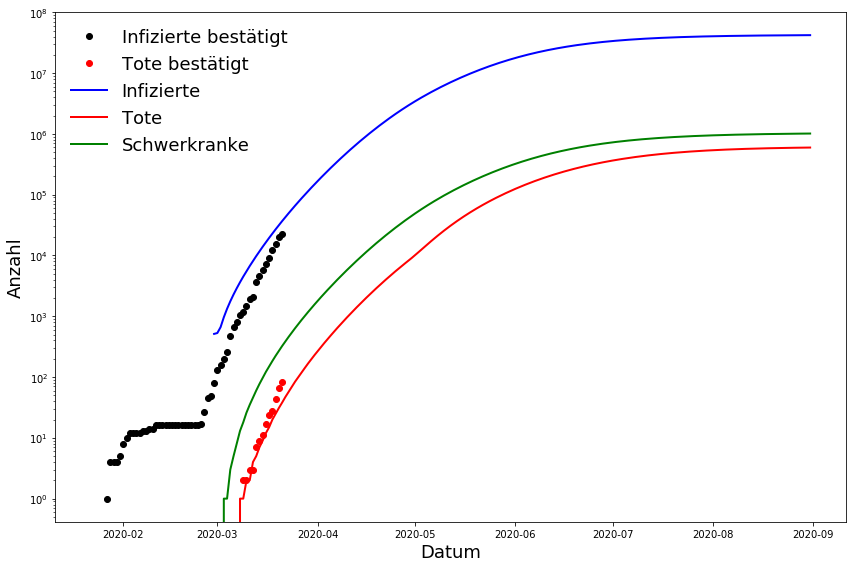

In [309]:
fig, ax =  plt.subplots(1,1, figsize=(12.0,8.0))
ax.set_yscale('log')

ax.plot(df_merge['Date'], df_merge['Confirmed'], 'ko', label = 'Infizierte bestätigt')
ax.plot(df_merge['Date'], df_merge['Deaths'], 'ro', label = 'Tote bestätigt')

ax.plot(df_merge['Date'], df_merge['cuminfected'], color = 'b',label = 'Infizierte',linewidth=2)
ax.plot(df_merge['Date'], df_merge['dead'], color = 'r', label = 'Tote',linewidth=2)
ax.plot(df_merge['Date'], df_merge['intensive'], color = 'g', label = 'Schwerkranke',linewidth=2)

ax.set_xlabel('Datum',fontsize=18)
ax.set_ylabel('Anzahl',fontsize=18)

ax.legend(loc='best',fontsize=18.0,numpoints=1, frameon=False)

fig.tight_layout()


In [310]:
percent_infected = 100*df_merge['cuminfected'].max()/df_merge['susceptible'].max()
dead = df_merge['dead'].max()
print(f'{percent_infected:.3g}% der Bevölkerung infiziert, {dead:.0f} Tote')

50.3% der Bevölkerung infiziert, 596852 Tote


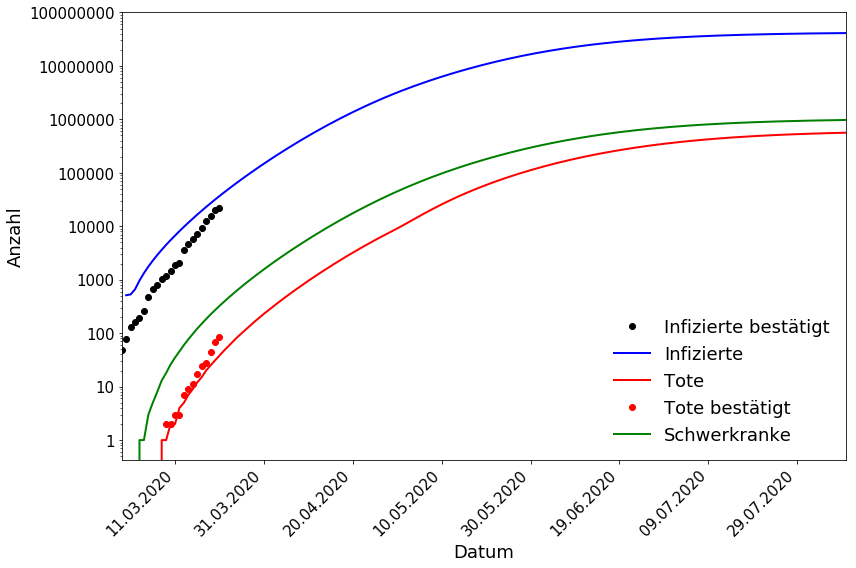

In [315]:
fig, ax =  plt.subplots(1,1, figsize=(12.0,8.0))
ax.set_yscale('log')

ax.plot(df_merge['Date'], df_merge['Confirmed'], 'ko', label = 'Infizierte bestätigt')


ax.plot(df_merge['Date'], df_merge['cuminfected'], color = 'b',label = 'Infizierte',linewidth=2)
ax.plot(df_merge['Date'], df_merge['dead'], color = 'r', label = 'Tote',linewidth=2)
ax.plot(df_merge['Date'], df_merge['Deaths'], 'ro', label = 'Tote bestätigt')

ax.plot(df_merge['Date'], df_merge['intensive'], color = 'g', label = 'Schwerkranke',linewidth=2)


# das folgende checke ich nicht, ist aber evtl auch nicht nötig?
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()

ax.set_xticks(ax.get_xticks()[::20])
ax.tick_params(axis='x', rotation=45,labelsize=15)

ax.set_yticklabels([int(x) for x in ax.get_yticks()],fontsize=15)

ax.set_xlim(df_merge['Date'][37],df_merge['Date'][200] )

ax.set_xlabel('Datum',fontsize=18)
ax.set_ylabel('Anzahl',fontsize=18)

ax.legend(loc='best',fontsize=18.0,numpoints=1, frameon=False)

fig.tight_layout()

plt.savefig('Deutschland_Model_Bestätigt.png',dpi=300)

In [350]:
def func(df, a, b, c):
    for i in range(df[0],df[:]):
        x = i
        return a * np.exp(-b * x) + c

[ 1.81636349e+02 -2.21434807e-01 -3.50663657e+02]


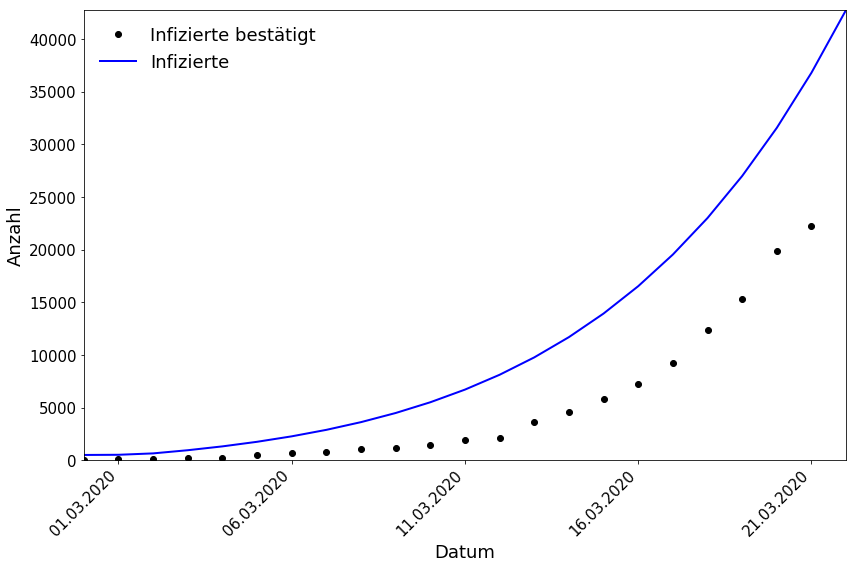

In [354]:
n_fit = df_merge['Confirmed'][38:50]
x_fit = df_merge['Date'][38:50]

        
#par, err = curve_fit(func,x_fit,n_fit)
#x_plot = np.arange(1,len(n_fit)+1,100)

print(par)

fig, ax =  plt.subplots(1,1, figsize=(12.0,8.0))

ax.plot(df_merge['Date'], df_merge['Confirmed'], 'ko', label = 'Infizierte bestätigt')
#ax.plot(x_plot,func(x_plot,par[0],par[1],par[2]),'k--', label = 'Fit')

ax.plot(df_merge['Date'], df_merge['cuminfected'], color = 'b',label = 'Infizierte',linewidth=2)


# das folgende checke ich nicht, ist aber evtl auch nicht nötig?
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()

ax.set_xticks(ax.get_xticks()[::5])
ax.tick_params(axis='x', rotation=45,labelsize=15)

ax.tick_params(axis='y',labelsize=15)

#ax.set_xlim(df_merge['Date'][38],df_merge['Date'][80] )
ax.set_xlim(df_merge['Date'][38],df_merge['Date'][60] )
ax.set_ylim(-10.0,df_merge['cuminfected'][60] )


ax.set_xlabel('Datum',fontsize=18)
ax.set_ylabel('Anzahl',fontsize=18)

ax.legend(loc='best',fontsize=18.0,numpoints=1, frameon=False)

fig.tight_layout()

plt.savefig('Deutschland_Infizierte_linear.png',dpi=300)

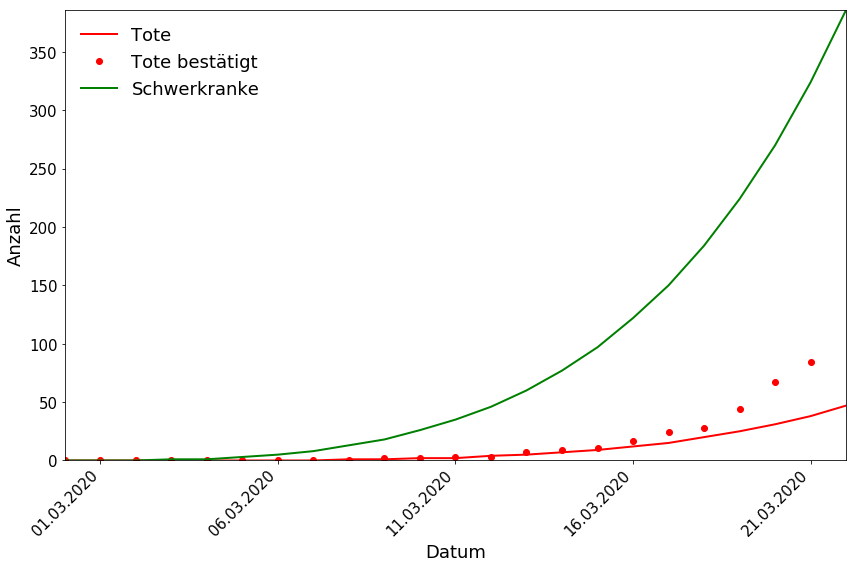

In [355]:
fig, ax =  plt.subplots(1,1, figsize=(12.0,8.0))

ax.plot(df_merge['Date'], df_merge['dead'], color = 'r', label = 'Tote',linewidth=2)
ax.plot(df_merge['Date'], df_merge['Deaths'], 'ro', label = 'Tote bestätigt')

ax.plot(df_merge['Date'], df_merge['intensive'], color = 'g', label = 'Schwerkranke',linewidth=2)


# das folgende checke ich nicht, ist aber evtl auch nicht nötig?
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()

ax.set_xticks(ax.get_xticks()[::5])
ax.tick_params(axis='x', rotation=45,labelsize=15)

ax.tick_params(axis='y',labelsize=15)

#ax.set_xlim(df_merge['Date'][38],df_merge['Date'][80] )
ax.set_xlim(df_merge['Date'][38],df_merge['Date'][60] )
ax.set_ylim(-0.0,df_merge['intensive'][60] )


ax.set_xlabel('Datum',fontsize=18)
ax.set_ylabel('Anzahl',fontsize=18)

ax.legend(loc='best',fontsize=18.0,numpoints=1, frameon=False)

fig.tight_layout()

plt.savefig('Deutschland_Tote_linear.png',dpi=300)